<img src="https://s3-sa-east-1.amazonaws.com/preditiva.ai/diversos/preditiva_assinatura.jpg">

# Regressão Linear Múltipla

## Hands-On: Variáveis Qualitativas

In [1]:
# Pacotes de manipulação de dados
import numpy as np
import pandas as pd

# Pacotes gráficos
import matplotlib.pyplot as plt
import seaborn as sns

# Pacotes de modelagem
import statsmodels.api as sm

### Importação da base de dados

In [2]:
df = pd.read_csv('base_funcionarios_v4.csv', 
                 sep=',', 
                 index_col=0)
df.shape

(46, 5)

In [3]:
df.sample(5, random_state=42)

,Salario,Anos_Educ_Superior,Tempo_Empresa,Tempo_de_Carreira,Possui_Skill_Dados
39,8082.2,4,20,43.252417,Sim
25,4645.9,0,5,12.640970,Não
26,5736.9,7,0,8.222066,Não
44,6235.4,4,6,6.578993,Não
35,9857.1,8,12,23.448417,Sim


### Análise Exploratória dos Dados

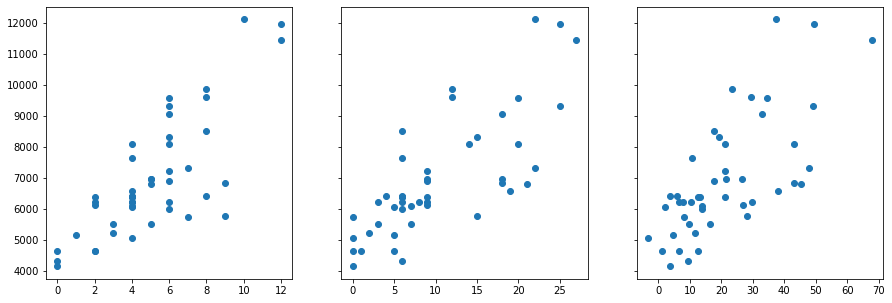

In [4]:
fig, ((ax1,ax2,ax3)) = plt.subplots(1,3,sharey=True,figsize=(15,5))
ax1.scatter(df['Anos_Educ_Superior'],df['Salario']);
ax2.scatter(df['Tempo_Empresa'],df['Salario']);
ax3.scatter(df['Tempo_de_Carreira'],df['Salario']);

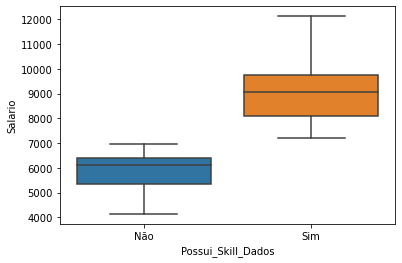

In [5]:
sns.boxplot(x=df['Possui_Skill_Dados'], 
            y=df['Salario']);

Como a distribuição entre quem tem e não tem skill de dados é tão diferente, é praticamente certo que essa variável contribuirá para que o modelo explique ainda mais a variabilidade da variável salário, ou seja, aumente o R². **Na prática**: as estimativas realizadas pelo modelo serão ainda melhores.

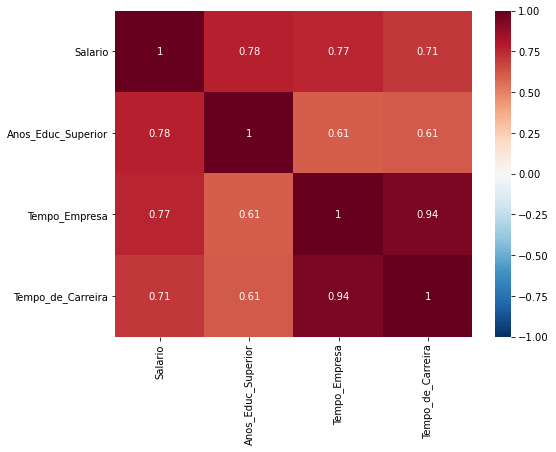

In [6]:
fig = plt.figure(figsize=(8,6))
sns.heatmap(df.corr(),
            cmap='RdBu_r',
            vmin=-1, vmax=1,
            annot=True);

### Preparação dos Dados

#### Criando variáveis Dummy

In [7]:
df.sample(5, random_state=42)

,Salario,Anos_Educ_Superior,Tempo_Empresa,Tempo_de_Carreira,Possui_Skill_Dados
39,8082.2,4,20,43.252417,Sim
25,4645.9,0,5,12.640970,Não
26,5736.9,7,0,8.222066,Não
44,6235.4,4,6,6.578993,Não
35,9857.1,8,12,23.448417,Sim


In [8]:
# 1a Forma: Usando get_dummies()
df2 = pd.get_dummies(df, drop_first=True)
df2.sample(5, random_state=42)

,Salario,Anos_Educ_Superior,Tempo_Empresa,Tempo_de_Carreira,Possui_Skill_Dados_Sim
39,8082.2,4,20,43.252417,1
25,4645.9,0,5,12.640970,0
26,5736.9,7,0,8.222066,0
44,6235.4,4,6,6.578993,0
35,9857.1,8,12,23.448417,1


In [9]:
# 2a Forma: Usando np.where()
df3 = df.copy() # Copia o dataframe
df3['Possui_Skill_Dados_Sim'] = np.where(df['Possui_Skill_Dados'] == 'Sim', 1, 0) # Essa função é análoga à função SE() do Excel
df3.sample(5, random_state=42)

,Salario,Anos_Educ_Superior,Tempo_Empresa,Tempo_de_Carreira,Possui_Skill_Dados,Possui_Skill_Dados_Sim
39,8082.2,4,20,43.252417,Sim,1
25,4645.9,0,5,12.640970,Não,0
26,5736.9,7,0,8.222066,Não,0
44,6235.4,4,6,6.578993,Não,0
35,9857.1,8,12,23.448417,Sim,1


In [10]:
# 3a Forma: Usando map()
# Criação do De/Para a ser usado com a função .map()
de_para = {'Sim': 1, 'Não': 0} 

df4 = df.copy() # Copia o dataframe
df4['Possui_Skill_Dados_Sim'] = df['Possui_Skill_Dados'].map(de_para)
df4.sample(5, random_state=42)

,Salario,Anos_Educ_Superior,Tempo_Empresa,Tempo_de_Carreira,Possui_Skill_Dados,Possui_Skill_Dados_Sim
39,8082.2,4,20,43.252417,Sim,1
25,4645.9,0,5,12.640970,Não,0
26,5736.9,7,0,8.222066,Não,0
44,6235.4,4,6,6.578993,Não,0
35,9857.1,8,12,23.448417,Sim,1


### Ajuste do Modelo de Regressão usando o Statsmodels (Pacote de Modelos Estatísticos)

In [11]:
# Variável resposta


# Variáveis explicativas


In [12]:
# Ajusta o modelo e retorna os resultados


### Equação do modelo

### Interpretação do Modelo